# Sistemas Electrónicos para Comunicaciones Digitales
# Ejercicios de sistemas de comunicación inalámbrica

Tabla 1. Características del módulo Bluettoth BlueCore2 de CSR configurado en modo de monitorización o sondeo de bajo consumo con una conexión ACL (*Asynchronous Connectionless Link*)
>Packet Type | Packet Size (data bytes) | Data rate (kbps)
>--- | --- | ---
>DH1 (1 slot)  |  28 | 172.8
>DH3 (3 slots) | 183 | 585
>DH5 (5 slots) | 341 | 733.9

> Sniff interval ($T_{sniff}$) (ms) | $I_{sleep}$ (mA) | $I_{act}$ (mA)
> --- | --- | ---
>40   | 4.0 | 50
>470  | 2.5 | 50
>1280 | 0.5 | 50

Tabla 2. Características del módulo ZigBee MC1323x de Freescale
> $I_{sleep}$ ($\mu$A) | $I_{act}$ (mA)
> --- | ---
>   1 | 30






## **Ejercicio 1**

Se desea realizar una red inalámbrica de sensores distribuidos para monitorizar una serie de variables en distintos puntos de un área de medida. Cada nodo sensor del sistema realizará una adquisición cada $100\,ms$, codificará la información utilizando $20\,bytes$, empaquetará dicha información y la enviará periódicamente ($T_{per}$) al nodo coordinador o maestro. Para realizar una estimación, se considerará que los nodos sensores se alimentan con una batería con una capacidad nominal de $100\,mA·h$ y que el consumo está dominado por el módulo de comunicación inalámbrica.



### Apartado a)
a) Si se utiliza un módulo Bluetooth BlueCore2 de CSR para realizar la comunicación, en modo de sondeo de bajo consumo con una conexión ACL, determinar la duración de la batería del nodo sensor o esclavo cuando se configura la red con unperiodo de sondeo o monitorización de datos, $T_{per} = T_{sniff} = 470\,ms$, y se empaquetan los datosutilizando Packet Type DH3.

### Solución

#### Tasa efectiva
* Periodo de muestro: $T_{samplig}=T_s=100\,ms$
* Datos por muestra: $d=20\,bytes$
* Tasa efectiva: $DR_{eff}=\frac{20 bytes}{100 ms}= 200\,Bps = 1600\,bps$  


In [26]:
import numpy as np
Ts=100e-3
d=20
DReff=d*8/Ts
DReff

1600.0

#### Bluetooth BlueCore2. Packet Type DH3 ($183\,bytes$ y $585\,kbps$):
* Periodo de sondeo de datos: $T_{per}=470\,\mu s$
* Tasa de transmisión de datos: $DR = 585\,kbps$ 

#### Tamaño del paquete:

* $Samples\_per\_packet=T_{per}/T_s=\frac{470}{100}=4,7\approx 4\,samples\ per\ packet$
* $Bytes\_per\_packet = 4·20 = 80\,bytes$ 

In [27]:
Tper = 470e-3
DR_bt = 585000
Samples_per_packet = np.floor(Tper / Ts)
Bytes_per_packet = Samples_per_packet * d
print(Samples_per_packet, Bytes_per_packet)

4.0 80.0


#### Tiempo activo de transmisión:

* $T_{act} = \frac{Bytes\_per\_packet · 8}{DR}= 1,09\ ms$
* $T_{sleep} = T_{per}-T_{act} = 468,91 \ ms$

In [28]:
Tact_bt = Bytes_per_packet * 8 / DR_bt
Tsleep_bt = Tper - Tact_bt
print(Tact_bt, Tsleep_bt) 

0.001094017094017094 0.4689059829059829


#### Corriente consumida media: 
* Corriente consumida en modo activo: $I_{act} = 50\ mA$
* Corriente consumida en modo *sleep*: $I_{sleep} = 2,5\ mA$

![Consumos](https://raw.githubusercontent.com/feruhf/secd_gett_uvigo_pub/master/images/grafica_consumo.png)

* Corriente media consumida: $I_{av} = \frac{I_{act}·T_{act}+I_{sleep}·T_{sleep}}{T_{per}}=2,61\ mA$ 

In [29]:
Iact_bt   = 50e-3
Isleep_bt = 2.5e-3
Iav_bt = (Iact_bt*Tact_bt + Isleep_bt*Tsleep_bt)/Tper
Iav_bt

0.0026105655573740684

#### Duración de la batería
* Capacidad de la batería: $W_{bat}=100\ mA·h$
* Duración de la batería: $T_{work}=W_{bat}/I_{av}=\frac{100\ mA·h}{2,61\ mA} = 38,3\ horas = 1,6\ días$

In [30]:
Wbar = 100e-3 # A·h
Twork_h = Wbar / Iav_bt
Twork_d = Twork_h/24
print(Twork_h, Twork_d)

38.305875796732956 1.5960781581972066


### Apartado b)
Si se utiliza un módulo ZigBee MC1323x de Freescale para realizar la comunicación, con una tasa efectiva de datos de 9600 bps, considerando un consumo medio en modo activo (transmisión) $I_{act} = 30\ mA$, y un consumo medio en modo de reposo $I_{sleep} = 1\ \mu A$. Determinar la duración de la batería del nodo sensor o esclavo cuando se configura la red con un periodo de sondeo, $T_{per} = 470\ ms$.

### Solución

#### ZigBee MC1323x ($9600\,bps$):
* Periodo de sondeo de datos: $T_{per}=470\,\mu s$
* Tasa de transmisión de datos: $DR = 9600\,bps$ 

#### Tamaño del paquete:

* $Samples\ per\ packet=T_{per}/T_s=\frac{470}{100}=4,7\approx 4\,samples\ per\ packet$
* $Bytes\_por\_paquete = 4·20 = 80\,bytes$ 

In [31]:
Tper = 470e-3
DR_zb = 9600
#Samples_per_packet = np.floor(Tper / Ts)
#Bytes_per_packet = Samples_per_packet * d
print(Samples_per_packet, Bytes_per_packet)

4.0 80.0


#### Tiempo activo de transmisión:

* $T_{act} = \frac{Bytes\_per\_packet · 8}{DR}= 66,67\ ms$
* $T_{sleep} = T_{per}-T_{act} = 403,33\ ms$

In [32]:
Tact_zb = Bytes_per_packet * 8 / DR_zb
Tsleep_zb = Tper - Tact_zb
print(Tact_zb, Tsleep_zb) 

0.06666666666666667 0.4033333333333333


#### Corriente consumida media: 
* Corriente consumida en modo activo: $I_{act} = 30\ mA$
* Corriente consumida en modo *sleep*: $I_{sleep} = 1\ \mu A$
* Corriente media consumida: $I_{av} = \frac{I_{act}·T_{act}+I_{sleep}·T_{sleep}}{T_{per}}= 4,26\ mA$ 

In [33]:
Iact_zb   = 30e-3
Isleep_zb = 1e-6
Iav_zb = (Iact_zb*Tact_zb + Isleep_zb*Tsleep_zb)/Tper
Iav_zb

0.00425617730496454

#### Duración de la batería
* Capacidad de la batería: $W_{bat}=100\ mA·h$
* Duración de la batería: $T_{work}=W_{bat}/I_{av}=\frac{100\ mA·h}{2,61\ mA} = 23,5\ horas$

In [34]:
Wbar = 100e-3 # A·h
Twork_h = Wbar / Iav_zb
Twork_d = Twork_h/24
print(Twork_h, Twork_d)

23.495261788872575 0.978969241203024


### Apartado c)
c) ¿Cuál es la tasa efectiva de datos mínima del enlace ZigBee para que la duración de la batería de
los nodos sensores con comunicación ZigBee sea mayor que la de los nodos con comunicación
Bluetooth?

### Solución

#### Corriente media consumida:
>(1) $I_{av} = \frac{I_{act}·T_{act}+I_{sleep}·T_{sleep}}{T_{per}}$

>(2) $T_{sleep}=T_{per}-T_{act}$

>(3) $I_{av}=\frac{I_{act}·T_{act}+I_{sleep}·(T_{per}-T_{act})}{T_{per}}=\frac{I_{act}·T_{act}+I_{sleep}·T_{per}-I_{sleep}·T_{act}}{T_{per}} = \frac{T_{act}·(I_{act}-I_{sleep})+T_{per}·I_{sleep}}{T_{per}} $

>(4) $T_{act} = \frac{Bytes\_per\_packet · 8}{DR}$

>(5) $I_{av}=\frac{\frac{Bytes\_per\_packet · 8}{DR}·(I_{act}-I_{sleep})+T_{per}·I_{sleep}}{T_{per}}$

>(6) $\boxed{I_{av}=Bytes\_per\_packet·\frac{8·(I_{act}-I_{sleep})}{DR·T_{per}}+I_{sleep}}$


#### Condición de consumo:
* $I_{av_{ZB}}<I_{av_{BT}}$

* $Bytes\_per\_packet·\frac{8·(I_{act_{ZB}}-I_{sleep_{ZB}})}{DR_{ZB}·T_{per}}+I_{sleep_{ZB}} < Bytes\_per\_packet·\frac{8·(I_{act_{BT}}-I_{sleep_{BT}})}{DR_{BT}·T_{per}}+I_{sleep_{BT}}$

* $\boxed{Bytes\_per\_packet < \frac{I_{sleep_{BT}} -I_{sleep_{ZB}}}{\frac{8·(I_{act_{ZB}}-I_{sleep_{ZB}})}{DR_{ZB}·T_{per}} - \frac{8·(I_{act_{BT}}-I_{sleep_{BT}})}{DR_{BT}·T_{per}}}\approx 48\ bytes}$

#### Tasa efectiva mínima:
* $DR_{eff}=(\frac{Bytes\_per\_packet·8}{Samples\_per\_packet})/T_s = Bytes\_per\_packet·\frac{8}{Samples\_per\_packet·T_s} \approx 964\ bps$



In [35]:
Bytes_per_packet_min = (Isleep_bt-Isleep_zb)/(8*(Iact_zb-Isleep_zb)/(DR_zb*Tper)-8*(Iact_bt-Isleep_bt)/(DR_bt*Tper))
DReff_min=Bytes_per_packet_min*8/Samples_per_packet/Ts
print(Bytes_per_packet_min, DReff_min)

48.23612250682499 964.7224501364998


In [36]:
DReffmin=Bytes_per_packet_min*8/Samples_per_packet/Ts
DReffmin

964.7224501364998

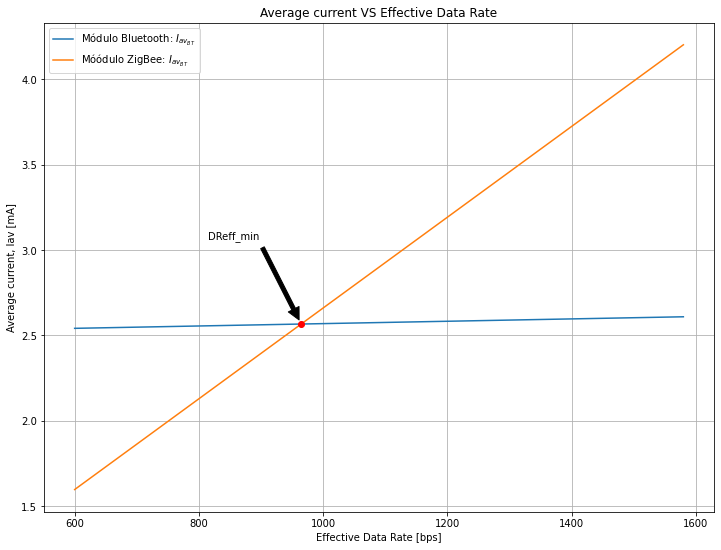

In [37]:
import matplotlib.pyplot as plt
Bytes_per_packet_arr=np.arange(30,80,1)
Iav_zb_arr = Bytes_per_packet_arr*8/(DR_zb*Tper)*(Iact_zb-Isleep_zb)+Isleep_zb
Iav_bt_arr = Bytes_per_packet_arr*8/(DR_bt*Tper)*(Iact_bt-Isleep_bt)+Isleep_bt

Iav_th = Bytes_per_packet_min*8/(DR_bt*Tper)*(Iact_bt-Isleep_bt)+Isleep_bt

Bits_per_packet_arr = Bytes_per_packet_arr*8
DReff_arr = Bytes_per_packet_arr*8/Samples_per_packet/Ts

plt.figure(figsize=[12,9])
plt.plot(DReff_arr,Iav_bt_arr*1e3, label='Módulo Bluetooth: $I_{av_{BT}}$')
plt.plot(DReff_arr,Iav_zb_arr*1e3, label='Móódulo ZigBee: $I_{av_{BT}}$')
plt.plot(DReff_min,Iav_th*1e3,'ro')
plt.annotate('DReff_min', xy=(DReff_min,Iav_th*1e3), xytext=(DReff_min-150,Iav_th*1e3+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.title("Average current VS Effective Data Rate")
plt.ylabel('Average current, Iav [mA]')
plt.xlabel('Effective Data Rate [bps]')
plt.legend()
plt.grid()
plt.show()